In [13]:
import numpy as np
import nnfs
from nnfs.datasets import vertical_data
import matplotlib.pyplot as plt

In [14]:
nnfs.init()

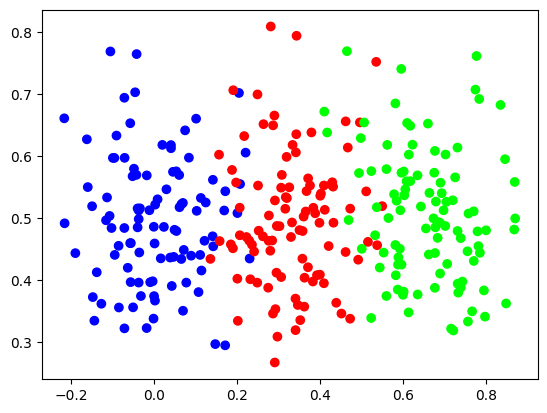

In [28]:
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [16]:
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons) -> None:
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

        """
        [[1, 2],
         [3, 4],
         [5, 6]]
        """

    # forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
        pass

In [17]:
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [18]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

In [19]:
class Loss:
    def calculate(self, output, truth):
        sample_losses = self.forward(output, truth)

        data_loss = np.mean(sample_losses)

        return data_loss

In [20]:
class Loss_CategoricalCrossEntropy(Loss):     
    def forward(self, output, truth):
        clipped_output = np.clip(output, 1e-7, 1 - 1e-7)

        # Output should be an array of prediction arrays. Truth can either be a an array of indexes to query for loss, or a matrix of equal size with ground truths
        if (len(truth.shape) == 1):
            correct_confidences = clipped_output[range(len(clipped_output)), truth]
            losses = -np.log(correct_confidences)
            mean_loss = np.mean(losses)
            return mean_loss

        elif (len(truth.shape) == 2):
            correct_confidences = np.sum(clipped_output * truth, axis=1)
            losses = -np.log(correct_confidences)
            mean_loss = np.mean(losses)
            return mean_loss

In [29]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossEntropy()

# Helper variables
lowest_loss = 9999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()


for iteration in range(0, 100000):

    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Perform a forward pass through both layers
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    # Activation 2 gets softmax output
    activation2.forward(dense2.output)

    # Calculate loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    # if loss is lower than lowest loss, then make those new weights
    if loss < lowest_loss:
        print('new set of weights found, iteration:', iteration, 'loss', loss, 'accuracy', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

new set of weights found, iteration: 0 loss 1.0983659 accuracy 0.3333333333333333
new set of weights found, iteration: 3 loss 1.098252 accuracy 0.3333333333333333
new set of weights found, iteration: 4 loss 1.0960885 accuracy 0.3333333333333333
new set of weights found, iteration: 7 loss 1.0958526 accuracy 0.3333333333333333
new set of weights found, iteration: 8 loss 1.0945208 accuracy 0.3333333333333333
new set of weights found, iteration: 9 loss 1.092807 accuracy 0.3333333333333333
new set of weights found, iteration: 11 loss 1.0911202 accuracy 0.3333333333333333
new set of weights found, iteration: 17 loss 1.0893332 accuracy 0.3333333333333333
new set of weights found, iteration: 19 loss 1.0889945 accuracy 0.3333333333333333
new set of weights found, iteration: 20 loss 1.0872543 accuracy 0.3333333333333333
new set of weights found, iteration: 21 loss 1.0829718 accuracy 0.3333333333333333
new set of weights found, iteration: 23 loss 1.0817798 accuracy 0.45
new set of weights found, 